In [1]:
import numpy as np
np.random.seed(0)

import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt


# PART 1: Training a convolutional neural network

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1.0/255)

In [3]:
imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32


train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)



val_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [ ]:
Xtrain, Ytrain = train_generator.next()

Xtest, Ytest = val_generator.next()

In [7]:
def make_convnet():
    num_classes = 1
    img_size = 64

    model = Sequential()
    model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(img_size, img_size, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))
    
    return model

In [8]:
model = make_convnet()
    
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [10]:
model_fit = model.fit(train_generator,
          epochs=20,
          verbose=1,
          validation_data=val_generator);

Train for 50 steps, validate for 18 steps
Epoch 1/20
50/50 [==============================] - 30s 591ms/step - loss: 0.6970 - accuracy: 0.5594 - val_loss: 0.6580 - val_accuracy: 0.7118
Epoch 2/20
50/50 [==============================] - 26s 511ms/step - loss: 0.6153 - accuracy: 0.7063 - val_loss: 0.5619 - val_accuracy: 0.7135
Epoch 3/20
50/50 [==============================] - 25s 500ms/step - loss: 0.5075 - accuracy: 0.7575 - val_loss: 0.6121 - val_accuracy: 0.7222
Epoch 4/20
50/50 [==============================] - 25s 502ms/step - loss: 0.4901 - accuracy: 0.7694 - val_loss: 0.5438 - val_accuracy: 0.7552
Epoch 5/20
50/50 [==============================] - 25s 503ms/step - loss: 0.4175 - accuracy: 0.7969 - val_loss: 0.5281 - val_accuracy: 0.7587
Epoch 6/20
50/50 [==============================] - 25s 501ms/step - loss: 0.3857 - accuracy: 0.8369 - val_loss: 0.7073 - val_accuracy: 0.6997
Epoch 7/20
50/50 [==============================] - 25s 503ms/step - loss: 0.3943 - accuracy: 0.8188

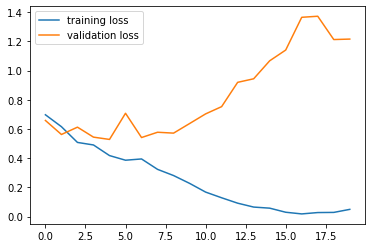

In [13]:
# Plotting training and validation loss
plt.plot(model_fit.history['loss']);
plt.plot(model_fit.history['val_loss']);
plt.legend(['training loss', 'validation loss']);

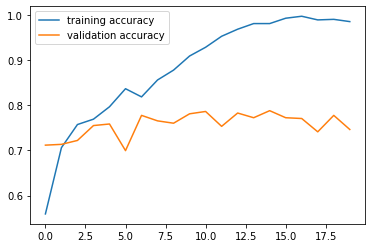

In [14]:
# Plotting training accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

# PART 2: Data augmentation

In [16]:
data_gen_new = ImageDataGenerator(rescale=1.0/255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True,vertical_flip = True)

train_generator_new = data_gen_new.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)



Found 1600 images belonging to 2 classes.


In [17]:
model_new = model.fit(train_generator_new,
         epochs = 20,
         verbose = 1,
         validation_data = val_generator)

Train for 50 steps, validate for 18 steps
Epoch 1/20
50/50 [==============================] - 27s 549ms/step - loss: 0.6777 - accuracy: 0.7181 - val_loss: 0.5950 - val_accuracy: 0.7118
Epoch 2/20
50/50 [==============================] - 29s 584ms/step - loss: 0.5321 - accuracy: 0.7412 - val_loss: 0.5478 - val_accuracy: 0.7500
Epoch 3/20
50/50 [==============================] - 28s 559ms/step - loss: 0.4884 - accuracy: 0.7694 - val_loss: 0.5338 - val_accuracy: 0.7326
Epoch 4/20
50/50 [==============================] - 29s 573ms/step - loss: 0.4700 - accuracy: 0.7869 - val_loss: 0.5556 - val_accuracy: 0.7674
Epoch 5/20
50/50 [==============================] - 28s 562ms/step - loss: 0.4698 - accuracy: 0.7837 - val_loss: 0.5217 - val_accuracy: 0.7795
Epoch 6/20
50/50 [==============================] - 28s 565ms/step - loss: 0.4338 - accuracy: 0.8031 - val_loss: 0.5128 - val_accuracy: 0.7639
Epoch 7/20
50/50 [==============================] - 28s 560ms/step - loss: 0.4180 - accuracy: 0.8006

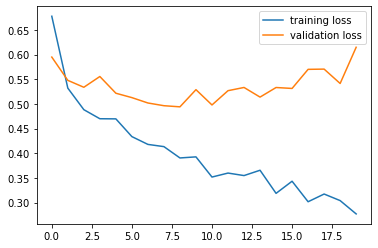

In [18]:
# Plotting training and validation loss
plt.plot(model_new.history['loss']);
plt.plot(model_new.history['val_loss']);
plt.legend(['training loss', 'validation loss']);

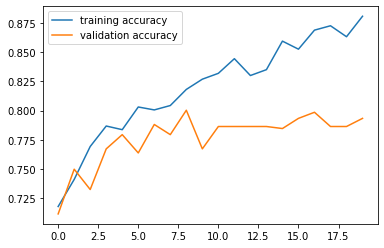

In [19]:
# Plotting training accuracy
plt.plot(model_new.history['accuracy'])
plt.plot(model_new.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

# Interlude: Applying a pre-trained convolutional neural network

In [20]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

In [21]:
import os

img_dir = '/Users/calvinsmith/Documents/GitHub/DIT867/PA5/a5_images/train/other/'

os.chdir(img_dir)

org_image = load_img(img_dir + '0001.jpg',target_size = (224,224))

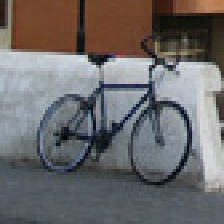

In [22]:
org_image

In [23]:
image = img_to_array(org_image)

In [24]:
image = preprocess_input(image)

In [25]:
image = image.reshape(1,224,224,3)

In [26]:
pred = vggmodel.predict(image)

In [27]:
decode_predictions(pred)

[[('n03792782', 'mountain_bike', 0.27120727),
  ('n04482393', 'tricycle', 0.1701205),
  ('n04509417', 'unicycle', 0.1312082),
  ('n02835271', 'bicycle-built-for-two', 0.052063823),
  ('n03785016', 'moped', 0.037459075)]]

# PART 3: Using VGG-16 as a feature extractor 

In [28]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [29]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [38]:
os.chdir('/Users/calvinsmith/Documents/GitHub/DIT867/PA5/a5_images')

def create_vgg16_features(dir,filename):
    
    generator = vgg_data_gen.flow_from_directory(
        os.getcwd() + dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)
    
    cnn_features = feature_extractor.predict(generator)
    
    with open (filename,'wb') as f:
        np.save(f,cnn_features)


    

In [33]:
os.getcwd()

'/Users/calvinsmith/Documents/GitHub/DIT867/PA5/a5_images'

In [39]:
create_vgg16_features('/train','vgg_train.txt')

Found 1600 images belonging to 2 classes.


In [40]:
create_vgg16_features('/validation','vgg_val.txt')

Found 576 images belonging to 2 classes.


In [41]:
with open('vgg_train.txt','rb') as f:
    data = np.load(f)

In [43]:
data.shape

(1600, 2, 2, 512)

In [48]:
# new classifier
transfer_model = Sequential()
transfer_model.add(Flatten(input_shape = (2,2,512) ))
transfer_model.add(Dense(128,activation = 'relu'))
transfer_model.add(Dense(1,activation = 'sigmoid'))

transfer_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

In [56]:
def train_on_cnnfeatures():
    
    batch_size = 32
    
    with open('vgg_train.txt','rb') as f:
        train = np.load(f)
    
    with open('vgg_val.txt','rb') as f:
        test = np.load(f)
        
    train_labels = get_labels(len(train))
    test_labels = get_labels(len(test))
    
    model_fit = transfer_model.fit(train,train_labels, 
                       batch_size = batch_size,
                       epochs = 20,
                       verbose = 1,
                       validation_data = (test,test_labels))
    return model_fit

In [57]:
model_fit = train_on_cnnfeatures()

Train on 1600 samples, validate on 576 samples
Epoch 1/20
1600/1600 [==============================] - 2s 1ms/sample - loss: 2.0201 - accuracy: 0.8594 - val_loss: 1.6457 - val_accuracy: 0.8524
Epoch 2/20
1600/1600 [==============================] - 1s 361us/sample - loss: 0.2466 - accuracy: 0.9569 - val_loss: 0.9142 - val_accuracy: 0.8802
Epoch 3/20
1600/1600 [==============================] - 1s 367us/sample - loss: 0.0288 - accuracy: 0.9919 - val_loss: 0.8086 - val_accuracy: 0.8854
Epoch 4/20
1600/1600 [==============================] - 1s 462us/sample - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.9096 - val_accuracy: 0.8785
Epoch 5/20
1600/1600 [==============================] - 1s 419us/sample - loss: 4.8163e-04 - accuracy: 1.0000 - val_loss: 0.8965 - val_accuracy: 0.8802
Epoch 6/20
1600/1600 [==============================] - 1s 353us/sample - loss: 2.2412e-04 - accuracy: 1.0000 - val_loss: 0.8951 - val_accuracy: 0.8819
Epoch 7/20
1600/1600 [==============================] - 1s 

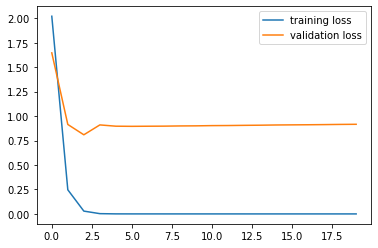

In [61]:
# Plotting training and validation loss
plt.plot(model_fit.history['loss']);
plt.plot(model_fit.history['val_loss']);
plt.legend(['training loss', 'validation loss']);

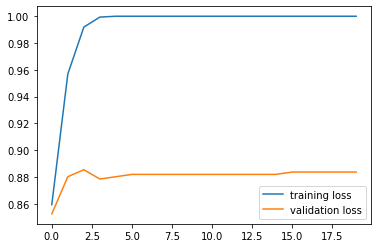

In [62]:
# Plotting training and validation loss
plt.plot(model_fit.history['accuracy']);
plt.plot(model_fit.history['val_accuracy']);
plt.legend(['training loss', 'validation loss']);

# Part 4: Visualizing the learned features

In [63]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [64]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

In [71]:
pos_img = kernel_image(first_layer_weights,1,True)

In [77]:
def visualize_feature(filter):
    pos_img = kernel_image(first_layer_weights,filter,True)
    neg_img = kernel_image(first_layer_weights,filter,False)
    
    plt.subplot(1,2,1)
    plt.imshow(pos_img)
    plt.title('Positive part')
    
    plt.subplot(1,2,2)
    plt.imshow(neg_img)
    plt.title('Negative part')
    
    plt.tight_layout()
    

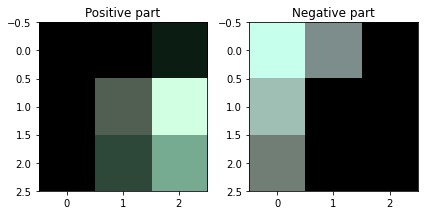

In [84]:
visualize_feature(60)